<br>

###   <font color="Coral">hw7pr2digits_modeler</font>
+ digits clasification -- and regression -- via NNets

Feel free to re-use your previous digits_cleaned.csv file 


### First, use the iris example to create a digit-predicting NNet

This is similar to the past two digits challenges, hw5 and hw6

**However**, because we're using NNets, you'll need to
+ create TEN categorical variables. You can use just one ``get_dummies`` pandas call
+ use a SCALER to make sure the network can, in a fair way, "hear" all of the inputs 

In [294]:
#
# coding cells, for copy-paste-and-adapt...

# libraries...
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [295]:
filename = 'digits_cleaned.csv' # neighborhoods
df_tidy = pd.read_csv(filename)      # encoding = "utf-8", "latin1"
print(f"{filename} : file read into a pandas dataframe.")

digits_cleaned.csv : file read into a pandas dataframe.


In [296]:
print(f"df_tidy.shape is {df_tidy.shape}\n")
df_tidy.info()  # prints column information
df_tidy

df_tidy.shape is (1768, 65)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 18  pix18         1768 non-null   int64
 19

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [297]:
df_tidy_cat = pd.get_dummies(data=df_tidy,prefix="is",columns=['actual_digit'])
df_tidy_cat

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,is_0,is_1,is_2,is_3,is_4,is_5,is_6,is_7,is_8,is_9
0,0,0,9,14,8,1,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,0,11,12,0,0,0,0,0,2,...,False,False,False,False,False,False,False,False,False,True
2,0,0,1,9,15,11,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
3,0,0,0,0,14,13,1,0,0,0,...,False,True,False,False,False,False,False,False,False,False
4,0,0,5,12,1,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,False,False,False,False,False,False,False,False,False,True
1764,0,0,6,16,13,11,1,0,0,0,...,True,False,False,False,False,False,False,False,False,False
1765,0,0,1,11,15,1,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1766,0,0,2,10,7,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True


In [298]:
ROW = 0
COLUMN = 1
df_model1 = df_tidy_cat #.drop('actual_digit', axis=COLUMN )
df_model1

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,is_0,is_1,is_2,is_3,is_4,is_5,is_6,is_7,is_8,is_9
0,0,0,9,14,8,1,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,0,11,12,0,0,0,0,0,2,...,False,False,False,False,False,False,False,False,False,True
2,0,0,1,9,15,11,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
3,0,0,0,0,14,13,1,0,0,0,...,False,True,False,False,False,False,False,False,False,False
4,0,0,5,12,1,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,False,False,False,False,False,False,False,False,False,True
1764,0,0,6,16,13,11,1,0,0,0,...,True,False,False,False,False,False,False,False,False,False
1765,0,0,1,11,15,1,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1766,0,0,2,10,7,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True


In [299]:
# let's keep our column names in variables, for reference
#
COLUMNS = df_model1.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")  
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")


FEATURES = COLUMNS[0:64]

#
# and our "species" names
#

# all of scikit-learn's ML routines need numbers, not strings
#   ... even for categories/classifications (like species!)
#   so, we will convert the flower-species to numbers:

SPECIES = ['is_0','is_1', 'is_2', 'is_3', 'is_4', 'is_5', 'is_6', 'is_7', 'is_8', 'is_9']   # int to str
SPECIES_INDEX = {'is_0':0,'is_1':1, 'is_2':2, 'is_3':3, 'is_4':4, 'is_5':5, 'is_6':6, 'is_7':7, 'is_8':8, 'is_9':9}  # str to int

#SPECIES = ['0','1','2','3','4','5','6','7','8','9']
#SPECIES_INDEX = {'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9}

# Let's try it out...
for name in SPECIES:
    print(f"{name} maps to {SPECIES_INDEX[name]}")

COLUMNS is Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63', 'is_0',
       'is_1', 'is_2', 'is_3', 'is_4', 'is_5', 'is_6', 'is_7', 'is_8', 'is_9'],
      dtype='object')

COLUMNS[0] is pix0

COL_INDEX is {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18':

In [300]:
A = df_model1.to_numpy()   
A = A.astype('float64')    # many types:  www.tutorialspoint.com/numpy/numpy_data_types.htm
print(A[0:5,:])

[[ 0.  0.  9. 14.  8.  1.  0.  0.  0.  0. 12. 14. 14. 12.  0.  0.  0.  0.
   9. 10.  0. 15.  4.  0.  0.  0.  3. 16. 12. 14.  2.  0.  0.  0.  4. 16.
  16.  2.  0.  0.  0.  3. 16.  8. 10. 13.  2.  0.  0.  1. 15.  1.  3. 16.
   8.  0.  0.  0. 11. 16. 15. 11.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   1.  0.]
 [ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
  16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
   9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.  0.  0.  0.  0.  9. 15.
   4.  0.  0.  0.  9. 12. 13.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
  16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
   0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
   0.  0.  0.  0.  1. 10. 13.  3.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0. 14. 13.  1.  0.  0.  0.  0.  5. 16. 16.  2.  0.  0.  0.
   0.

In [301]:
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 1768 rows and 74 cols


In [302]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

X_all = A[:,0:64]   # X (features) ... is all rows, columns 0, 1, 2, 3 thru 63
y_all = A[:,64:]    # y (labels) ... is all rows, columns 64

print(f"y_all (just the labels/species, first few rows) are \n {y_all[0:5]}")
print()
print(f"X_all (just the features, first few rows) are \n {X_all[0:5]}")

+++ Start of data definitions +++

y_all (just the labels/species, first few rows) are 
 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]

X_all (just the features, first few rows) are 
 [[ 0.  0.  9. 14.  8.  1.  0.  0.  0.  0. 12. 14. 14. 12.  0.  0.  0.  0.
   9. 10.  0. 15.  4.  0.  0.  0.  3. 16. 12. 14.  2.  0.  0.  0.  4. 16.
  16.  2.  0.  0.  0.  3. 16.  8. 10. 13.  2.  0.  0.  1. 15.  1.  3. 16.
   8.  0.  0.  0. 11. 16. 15. 11.  1.  0.]
 [ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
  16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
   9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.  0.  0.  0.  0.  9. 15.
   4.  0.  0.  0.  9. 12. 13.  3.  0.  0.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
  16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
   0.  8.  8.  0. 

In [303]:
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_all = X_all[indices]              # we apply the _same_ permutation to each!
y_all = y_all[indices]              # again...
print(f"The scrambled labels/species are \n {y_all[0:5]}")
print()
print(f"The corresponding data rows are \n {X_all[0:5]}")

The scrambled labels/species are 
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

The corresponding data rows are 
 [[ 0.  0.  6. 16. 15.  5.  0.  0.  0.  1. 16. 14.  8. 15.  1.  0.  0.  9.
  13.  1.  0. 12.  6.  0.  0.  5.  9.  0.  0.  9. 10.  0.  0.  6.  9.  0.
   0.  9. 11.  0.  0.  7. 16.  1.  0. 11. 11.  0.  0.  3. 16. 11. 13. 16.
   8.  0.  0.  0.  8. 16. 16. 12.  1.  0.]
 [ 0.  0.  0.  1. 13.  2.  0.  0.  0.  0.  0. 12. 14.  0.  0.  0.  0.  0.
   6. 14.  0.  0.  0.  0.  0.  1. 14.  5.  0.  0.  0.  0.  0.  9. 12.  0.
  12.  7.  0.  0.  0. 12. 14.  6. 16. 14.  1.  0.  0.  6. 16. 16. 16.  5.
   0.  0.  0.  0.  0.  3. 14.  0.  0.  0.]
 [ 0.  0.  6. 12. 16. 10.  0.  0.  0.  4. 15.  8. 12. 14.  0.  0.  0.  0.
   0.  0. 13.  8.  0.  0.  0.  0.  0.  6. 14.  1.  0.  0.  0.  0.  0.  5.
  15.  8.  0.  0.  0.  0.  0.  0.  2. 15.  5.  0.  0.  0.  1.  4.  5. 15.
   8.  0.  0

In [304]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"+++ Testing +++   Held-out data... (testing data: {len(y_test)})\n")
print(f"y_test: {y_test[0:5,:]}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print("\n")
print(f"+++ Training +++   Data used for modeling... (training data: {len(y_train)})\n")
print(f"y_train: {y_train[0:5,:]}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 1414 rows;  testing with 354 rows

+++ Testing +++   Held-out data... (testing data: 354)

y_test: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

X_test (few rows): [[ 0.  0.  7. 16. 14.  3.  0.  0.  0.  0.  9. 14. 11. 15.  0.  0.  0.  0.
   1.  5.  0. 15.  5.  0.  0.  0.  0.  0.  0. 16.  5.  0.  0.  0.  0.  0.
   3. 16.  4.  0.  0.  0.  0.  1. 12. 14.  1.  0.  0.  0.  5. 12. 16. 16.
  14.  1.  0.  0.  8. 16. 14. 10. 13.  3.]
 [ 0.  0.  0. 16. 11.  0.  0.  0.  0.  0.  6. 16. 10.  0.  0.  0.  0.  0.
  11. 11.  0.  0.  0.  0.  0.  0. 12. 15. 11.  5.  0.  0.  0.  0. 14. 15.
  12. 15. 11.  0.  0.  0. 12. 13.  0.  0. 16.  5.  0.  0.  6. 15.  4. 11.
  16.  4.  0.  0.  0. 13. 16. 14.  9.  0.]
 [ 0.  0.  0. 13.  1.  0.  0.  0.  0.  0. 10. 12.  1.  0.  0.  0.  0.  0.
  14.  3.  0.  0.  0.  0.  0.  4. 14.  0.  4.  5.  0.  0.  0.  7. 16.  4.
   7. 14.  7.  0.  0.  

In [305]:
from sklearn.preprocessing import StandardScaler

#
# do we want to use a Scaler?
#
USE_SCALER = True   # this variable is important! It tracks if we need to use the scaler...

# we "train the scaler"  (computes the mean and standard deviation)
if USE_SCALER == True:
    scaler = StandardScaler()
    scaler.fit(X_train)  # Scale with the training data! ave becomes 0; stdev becomes 1
else:
    # this one does no scaling!  We still create it to be consistent:
    scaler = StandardScaler(copy=True, with_mean=False, with_std=False) # no scaling
    scaler.fit(X_train)  # still need to fit, though it does not change...

scaler   # is now defined and ready to use...

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Here are our scaled training and testing sets:

X_train_scaled = scaler.transform(X_train) # scale!
X_test_scaled = scaler.transform(X_test) # scale!

y_train_scaled = y_train.copy()  # the predicted/desired labels are not scaled
y_test_scaled = y_test.copy()  # not using the scaler

In [306]:
def ascii_table(X,y,scaler_to_invert=None):
    """ print a table of inputs and outputs """
    np.set_printoptions(precision=2)  # Let's use less precision
    if scaler_to_invert == None:  # don't use the scaler
        X = X
    else:
        X = scaler_to_invert.inverse_transform(X)
    print(f"{'input ':>58s} -> {'pred':^7s} {'des':<5s}") 
    for i in range(len(y)):
        # whoa! serious f-string formatting:
        print(f"{str(X[i,0:4]):>58s} -> {'?':^7s} {str(y[i]):<21s}")   # !s is str ...
    print()
    
# to show the table with the scaled data:
ascii_table(X_train_scaled[0:5,:],y_train_scaled[0:5],None)

# to show the table with the original data:
ascii_table(X_train_scaled[0:5,:],y_train_scaled[0:5],scaler_to_invert=scaler)

                                                    input  ->  pred   des  
                                 [ 0.   -0.34 -1.09 -0.44] ->    ?    [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
                                     [0.   2.   1.46 0.98] ->    ?    [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
                                 [ 0.   -0.34 -0.66 -0.44] ->    ?    [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
                                 [ 0.   -0.34 -1.09 -0.91] ->    ?    [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
                                 [ 0.   -0.34 -0.24  0.98] ->    ?    [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

                                                    input  ->  pred   des  
                 [ 0.00e+00  0.00e+00 -8.88e-16  1.00e+01] ->    ?    [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
                                         [ 0.  2. 12. 16.] ->    ?    [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
                                         [ 0.  0.  2. 10.] ->    ?    [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
                 [ 0.00e+00  0.

In [307]:
from sklearn.neural_network import MLPClassifier

#
# Here's where you can change the number of hidden layers
# and number of neurons!  It's in the tuple  hidden_layer_sizes:
#
nn_classifier = MLPClassifier(hidden_layer_sizes=(6,7),  
                    # hidden_layer_sizes=(6,7)   means   4 inputs -> 6 hidden -> 7 hidden -> 3 outputs
                    max_iter=500,      # how many times to train
                    # activation="tanh", # the "activation function" input -> output
                    # solver='sgd',      # the algorithm for optimizing weights
                    verbose=True,      # False to "mute" the training
                    shuffle=True,      # reshuffle the training epochs?
                    random_state=None, # set for reproduceability
                    learning_rate_init=.1,       # learning rate: the amt of error to backpropagate!
                    learning_rate = 'adaptive')  # soften feedback as it converges

# documentation:
# scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html 
#     Try other network sizes / other parameters ...

print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
nn_classifier.fit(X_train_scaled, y_train_scaled)
print("\n++++++++++  TRAINING:   end  +++++++++++++++")
print(f"The analog prediction error (the loss) is {nn_classifier.loss_}")



++++++++++  TRAINING:  begin  +++++++++++++++


Iteration 1, loss = 4.74989495
Iteration 2, loss = 2.83975467
Iteration 3, loss = 2.44253925
Iteration 4, loss = 2.16232522
Iteration 5, loss = 2.00659586
Iteration 6, loss = 1.92330265
Iteration 7, loss = 1.84284383
Iteration 8, loss = 1.77604590
Iteration 9, loss = 1.70465529
Iteration 10, loss = 1.62037925
Iteration 11, loss = 1.57983051
Iteration 12, loss = 1.57966168
Iteration 13, loss = 1.50814681
Iteration 14, loss = 1.42192273
Iteration 15, loss = 1.32696727
Iteration 16, loss = 1.29248427
Iteration 17, loss = 1.37588699
Iteration 18, loss = 1.33101732
Iteration 19, loss = 1.23723720
Iteration 20, loss = 1.19147665
Iteration 21, loss = 1.08186634
Iteration 22, loss = 0.98725826
Iteration 23, loss = 0.91972117
Iteration 24, loss = 0.91499733
Iteration 25, loss = 0.91616442
Iteration 26, loss = 0.89496509
Iteration 27, loss = 0.84592956
Iteration 28, loss = 0.90593338
Iteration 29, loss = 0.91598955
Iteration 30, loss = 0.95544146

In [308]:
print(A[1])

print(SPECIES)

[ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
 16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
  9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.  0.  0.  0.  0.  9. 15.
  4.  0.  0.  0.  9. 12. 13.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.]
['is_0', 'is_1', 'is_2', 'is_3', 'is_4', 'is_5', 'is_6', 'is_7', 'is_8', 'is_9']


In [309]:
def get_species(A):
    """ returns the species for A ~ [1 0 0] or [0 1 0] or ... """
    for i in range(len(SPECIES)):
        if A[i] == 1: 
            return SPECIES[i]  # note that this "takes the first one"
    return "no species" 

SEE_PROBS = False

def ascii_table_for_classifier(Xsc,y,nn,scaler):
    """ a table including predictions using nn.predict """
    predictions = nn.predict(Xsc)            # all predictions
    prediction_probs = nn.predict_proba(Xsc) # all prediction probabilities
    Xpr = scaler.inverse_transform(Xsc)      # Xpr is the "X to print": the unscaled data
    # count correct
    num_correct = 0
    # printing
    print(f"{'input ':>28s} -> {'pred':^12s} {'des.':^12s}") 
    for i in range(len(y)):
        pred = predictions[i]
        pred_probs = str(prediction_probs[i,:])
        desired = y[i].astype(int)
        # print(pred, desired, pred_probs)
        pred_species = get_species(pred)
        des_species  = get_species(desired)
        if pred_species != des_species: result = "  incorrect: " + pred_probs
        else: result = "  correct" + (": "+pred_probs if SEE_PROBS else "") ; num_correct += 1
        # Xpr = Xsc  # if you want to see the scaled versions
        print(f"{Xpr[i,0:4]!s:>28s} -> {pred_species:^12s} {des_species:12s} {result:^10s}") 
    print(f"\ncorrect predictions: {num_correct} out of {len(y)}")
    
#
# let's see how it did on the test data (also the training data!)
#
ascii_table_for_classifier(X_test_scaled,
                           y_test_scaled,
                           nn_classifier,
                           scaler)  

                      input  ->     pred         des.    
           [ 0.  0.  7. 16.] ->  no species  is_2           incorrect: [3.14e-05 3.53e-04 4.40e-04 8.13e-03 1.49e-03 8.32e-05 4.94e-05 7.00e-09
 3.00e-02 1.89e-04]
[ 0.00e+00  0.00e+00 -8.88e-16  1.60e+01] ->     is_6     is_6           correct 
[ 0.00e+00  0.00e+00 -8.88e-16  1.30e+01] ->     is_6     is_6           correct 
           [ 0.  0.  7. 13.] ->     is_9     is_9           correct 
           [ 0.  0.  6. 16.] ->     is_7     is_7           correct 
           [ 0.  0.  3. 16.] ->     is_4     is_4           correct 
           [ 0.  0.  6. 16.] ->     is_0     is_0           correct 
           [ 0.  0.  7. 15.] ->     is_2     is_2           correct 
           [ 0.  0.  3. 15.] ->     is_4     is_4           correct 
           [ 0.  0. 15. 14.] ->     is_5     is_5           correct 
[ 0.00e+00  0.00e+00 -8.88e-16  8.00e+00] ->     is_6     is_6           correct 
[ 0.00e+00  0.00e+00 -8.88e-16  6.00e+00] ->     

In [310]:
# We don't usually look inside the NNet, but we can: it's open-box modeling...
#
if True:  # do we want to see all of the parameters?
    np.set_printoptions(precision=2)  # Let's use less precision
    nn = nn_classifier  # less to type?
    print("\n\n+++++ parameters, weights, etc. +++++\n")
    print(f"\nweights/coefficients:\n")
    for i, wts in enumerate(nn.coefs_):
        print(f"[[ Layer {i} ]]\n   has shape = {wts.shape} and weights =\n{wts}")
        print(f"   with intercepts:\n {nn.intercepts_[i]}\n")
    print()
    print(f"\nall parameters: {nn.get_params()}")



+++++ parameters, weights, etc. +++++


weights/coefficients:

[[ Layer 0 ]]
   has shape = (64, 6) and weights =
[[ 3.46e-03 -5.65e-03 -3.08e-04  1.53e-04 -1.53e-04  1.58e-02]
 [-5.12e-01  2.68e-01  1.55e+00 -1.05e+00 -3.90e-01 -3.97e-01]
 [ 1.64e+00 -1.75e+00 -1.83e-01 -1.91e+00 -4.30e-01  5.61e-01]
 [-1.44e+00 -8.80e-01  7.60e-01 -1.55e+00  8.42e-01  1.74e+00]
 [ 7.97e-01 -1.90e+00  8.82e-01  7.22e-01  3.10e-01  8.66e-01]
 [ 1.31e+00  3.34e-02 -3.43e-01 -1.77e+00 -2.14e+00 -4.39e-01]
 [ 2.17e+00 -4.58e-01  9.84e-01 -1.74e+00 -1.35e+00  7.26e-01]
 [-1.86e+00 -1.05e+00  2.09e-01  2.04e-01 -4.94e-01 -8.01e-01]
 [-6.78e-01 -1.26e+00 -4.22e-01  3.44e-01  2.43e-01  5.10e-02]
 [-2.24e-01 -1.99e+00  5.21e-01 -1.07e+00 -3.44e-01 -7.86e-01]
 [ 3.49e-01 -2.68e+00  1.95e+00 -1.47e+00 -5.52e-01  9.37e-02]
 [-1.08e+00 -1.07e+00  1.37e+00 -4.54e-01  1.17e+00  6.86e-01]
 [ 2.35e-01 -3.25e+00  1.34e+00 -1.33e+00  8.13e-01  1.08e-01]
 [-3.56e-02 -2.96e-01 -1.01e+00  5.23e-01 -4.31e-01 -6.06e-01]
 [

In [ ]:
########

In [311]:


def get_species(A):
    """ returns the species for A ~ [1 0 0] or [0 1 0] or ... """
    for i in range(len(SPECIES)):
        if A[i] == 1: 
            return SPECIES[i]  # note that this "takes the first one"
    return "no species" 


def predictive_model( Features, MODEL, SCALER ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    scaled_features = SCALER.transform(our_features)      # we have to scale the features into "scaled space"
    predicted_cat = MODEL.predict(scaled_features)        # then, the nnet can predict our "cat" variables
    prediction_probs = nn.predict_proba(scaled_features) # all prediction probabilities
    # our_features = SCALER.inverse_transform(scaled_features)  # we can convert back (optional!)
    predicted_species = get_species(predicted_cat[0])     # (it's extra-nested) get the species name
    return predicted_species, prediction_probs
   
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
Features = [0,0,0,8,14,0,0,0,0,0,5,16,11,0,0,0,0,1,15,14,1,6,0,0,0,7,16,5,3,16,8,0,0,8,16,8,14,16,2,0,0,0,6,14,16,11,0,0,0,0,0,6,16,4,0,0,0,0,0,10,15,0,0,0] # [5.8,2.7,4.1,1.0] # [4.6,3.6,3.0,2.2] [6.7,3.3,5.7,2.1]

LoD = [[0,0,0,8,14,0,0,0,0,0,5,16,11,0,0,0,0,1,15,14,1,6,0,0,0,7,16,5,3,16,8,0,0,8,16,8,14,16,2,0,0,0,6,14,16,11,0,0,0,0,0,6,16,4,0,0,0,0,0,10,15,0,0,0],
[0,0,0,5,14,12,2,0,0,0,7,15,8,14,4,0,0,0,6,2,3,13,1,0,0,0,0,1,13,4,0,0,0,0,1,11,9,0,0,0,0,8,16,13,0,0,0,0,0,5,14,16,11,2,0,0,0,0,0,6,12,13,3,0],
[0,0,0,3,16,3,0,0,0,0,0,12,16,2,0,0,0,0,8,16,16,4,0,0,0,7,16,15,16,12,11,0,0,8,16,16,16,13,3,0,0,0,0,7,14,1,0,0,0,0,0,6,16,0,0,0,0,0,0,4,14,0,0,0],
[0,0,0,3,15,10,1,0,0,0,0,11,10,16,4,0,0,0,0,12,1,15,6,0,0,0,0,3,4,15,4,0,0,0,0,6,15,6,0,0,0,4,15,16,9,0,0,0,0,0,13,16,15,9,3,0,0,0,0,4,9,14,7,0],
[0,0,0,3,16,3,0,0,0,0,0,10,16,11,0,0,0,0,4,16,16,8,0,0,0,2,14,12,16,5,0,0,0,10,16,14,16,16,11,0,0,5,12,13,16,8,3,0,0,0,0,2,15,3,0,0,0,0,0,4,12,0,0,0],
[0,0,7,15,15,4,0,0,0,8,16,16,16,4,0,0,0,8,15,8,16,4,0,0,0,0,0,10,15,0,0,0,0,0,1,15,9,0,0,0,0,0,6,16,2,0,0,0,0,0,8,16,8,11,9,0,0,0,9,16,16,12,3,0]]


SEE_PROBS = False

# run on each one:
for Features in LoD:
    MODEL = nn_classifier
    SCALER = scaler
    name, probs = predictive_model( Features, MODEL, SCALER )  # pass in the model, too!
    prob_str = "   with probs: " + str(probs) if SEE_PROBS == True else ""
    print(f"I predict {name:>12s} from the features {Features}  {prob_str}")    # Answers in the assignment...

I predict         is_4 from the features [0, 0, 0, 8, 14, 0, 0, 0, 0, 0, 5, 16, 11, 0, 0, 0, 0, 1, 15, 14, 1, 6, 0, 0, 0, 7, 16, 5, 3, 16, 8, 0, 0, 8, 16, 8, 14, 16, 2, 0, 0, 0, 6, 14, 16, 11, 0, 0, 0, 0, 0, 6, 16, 4, 0, 0, 0, 0, 0, 10, 15, 0, 0, 0]  
I predict         is_2 from the features [0, 0, 0, 5, 14, 12, 2, 0, 0, 0, 7, 15, 8, 14, 4, 0, 0, 0, 6, 2, 3, 13, 1, 0, 0, 0, 0, 1, 13, 4, 0, 0, 0, 0, 1, 11, 9, 0, 0, 0, 0, 8, 16, 13, 0, 0, 0, 0, 0, 5, 14, 16, 11, 2, 0, 0, 0, 0, 0, 6, 12, 13, 3, 0]  
I predict         is_4 from the features [0, 0, 0, 3, 16, 3, 0, 0, 0, 0, 0, 12, 16, 2, 0, 0, 0, 0, 8, 16, 16, 4, 0, 0, 0, 7, 16, 15, 16, 12, 11, 0, 0, 8, 16, 16, 16, 13, 3, 0, 0, 0, 0, 7, 14, 1, 0, 0, 0, 0, 0, 6, 16, 0, 0, 0, 0, 0, 0, 4, 14, 0, 0, 0]  
I predict         is_2 from the features [0, 0, 0, 3, 15, 10, 1, 0, 0, 0, 0, 11, 10, 16, 4, 0, 0, 0, 0, 12, 1, 15, 6, 0, 0, 0, 0, 3, 4, 15, 4, 0, 0, 0, 0, 6, 15, 6, 0, 0, 0, 4, 15, 16, 9, 0, 0, 0, 0, 0, 13, 16, 15, 9, 3, 0, 0, 0, 0, 4, 9, 14, 7,

### Second, from the iris example create a _pixel-predicting_ &nbsp; NNet

Choose a pixel to predict!
+ It _can_ be #42 -- or choose another one?!
+ This will be _regression_, not classification
+ It will show off NNets' ability to generate or "hallucinate" pixels/digits/images/etc.!
+ The _digit dreaming_ problem will extend this further...

<b>Predict-a-pixel</b> (regression)...
+ As the penultimate part of this digits-analysis with NNets, 
+ create a regressor that predicts pixel 42 from the other 63 pixels!
+ Remember that pixel 42 will be `A[:,42]`
+ and, the other 63, plus the digit-species, will be `np.concatenate((A[:,0:42], A[:,43:]),axis=1)`
+ see the iris_modeler for an example for the irises' botanical features...

In [313]:
#
# coding cells, for copy-paste-and-adapt...

print(COL_INDEX)
print()
print(COLUMNS)

{'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23': 23, 'pix24': 24, 'pix25': 25, 'pix26': 26, 'pix27': 27, 'pix28': 28, 'pix29': 29, 'pix30': 30, 'pix31': 31, 'pix32': 32, 'pix33': 33, 'pix34': 34, 'pix35': 35, 'pix36': 36, 'pix37': 37, 'pix38': 38, 'pix39': 39, 'pix40': 40, 'pix41': 41, 'pix42': 42, 'pix43': 43, 'pix44': 44, 'pix45': 45, 'pix46': 46, 'pix47': 47, 'pix48': 48, 'pix49': 49, 'pix50': 50, 'pix51': 51, 'pix52': 52, 'pix53': 53, 'pix54': 54, 'pix55': 55, 'pix56': 56, 'pix57': 57, 'pix58': 58, 'pix59': 59, 'pix60': 60, 'pix61': 61, 'pix62': 62, 'pix63': 63, 'is_0': 64, 'is_1': 65, 'is_2': 66, 'is_3': 67, 'is_4': 68, 'is_5': 69, 'is_6': 70, 'is_7': 71, 'is_8': 72, 'is_9': 73}

Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pi

In [321]:
print(range(0,65))

range(0, 65)


In [337]:

print("+++ Start of data-assembly for feature-regression! +++\n")
# construct the correct X_all from the columns we want
# we use np.concatenate to combine parts of the dataset to get all-except-column 0:
#                     exclude 0  , include 1 to the end

predictedPixelValues = []
errorList = []

for i in range(0,64): # or just for i in [42] for the first iteration of this

    # when i = 0: sepallen, i = 1: sepalwid, i = 2: petallen, i = 3: petalwid

    X_all = np.concatenate( (A[:,0:i], A[:,i+1:]), axis=1)   
    # X_all = np.concatenate( (A[:,0:i], A[:,i+1:]), axis=1)    # if i == 42, we should be excluding that pixel


    y_all = A[:,i]                    # y (labels) ... is all of column 0, sepallen (sepal length) 
    #                                 # change the line above to make other columns the target (y_all)


    # we scramble the data, to give a different TRAIN/TEST split each time...
    # 
    indices = np.random.permutation(len(y_all))  # indices is a permutation-list

    # we scramble both X and y, necessarily with the same permutation
    X_all = X_all[indices]              # we apply the _same_ permutation to each!
    y_all = y_all[indices]              # again...


    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)

    # for NNets, it's important to keep the feature values near 0, say -1. to 1. or so
    #    This is done through the "StandardScaler" in scikit-learn
    #
    from sklearn.preprocessing import StandardScaler

    USE_SCALER = True   # this variable is important! It tracks if we need to use the scaler...

    # we "train the scaler"  (computes the mean and standard deviation)
    if USE_SCALER == True:
        scaler = StandardScaler()
        scaler.fit(X_train)  # Scale with the training data! ave becomes 0; stdev becomes 1
    else:
        # this one does no scaling!  We still create it to be consistent:
        scaler = StandardScaler(copy=True, with_mean=False, with_std=False) # no scaling
        scaler.fit(X_train)  # still need to fit, though it does not change...

    scaler   # is now defined and ready to use...

    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++

    # Here are our scaled training and testing sets:

    X_train_scaled = scaler.transform(X_train) # scale!
    X_test_scaled = scaler.transform(X_test) # scale!

    y_train_scaled = y_train  # the predicted/desired labels are not scaled
    y_test_scaled = y_test  # not using the scaler

    # reused from above - seeing the scaled data 
    # ascii_table(X_train_scaled[0:5,:],y_train_scaled[0:5],None)

    # reused from above - seeing the unscaled data (inverting the scaler)
    # ascii_table(X_train_scaled[0:5,:],y_train_scaled[0:5],scaler)

    # MLPRegressor predicts _floating-point_ outputs


    from sklearn.neural_network import MLPRegressor

    nn_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                        max_iter=500,          # how many training epochs
                        verbose=True,          # do we want to watch as it trains?
                        shuffle=True,          # shuffle each epoch?
                        random_state=None,     # use for reproducibility
                        learning_rate_init=.1, # how much of each error to back-propagate
                        learning_rate = 'adaptive')  # how to handle the learning_rate

    nn_regressor.fit(X_train_scaled, y_train_scaled)


    def ascii_table_for_regressor(Xsc,y,nn,scaler):
        """ a table including predictions using nn.predict """
        predictions = nn.predict(Xsc) # all predictions
        Xpr = scaler.inverse_transform(Xsc)  # Xpr is the "X to print": unscaled data!
        # measure error
        error = 0.0
        # printing
        # print(f"{'input ':>35s} ->  {'pred':^6s}  {'des.':^6s}   {'absdiff':^10s}") 
        for i in range(len(y)):
            pred = predictions[i]
            desired = y[i]
            result = abs(desired - pred)
            error += result
            # Xpr = Xsc   # if you'd like to see the scaled values
            # print(f"{Xpr[i,:]!s:>35s} ->  {pred:<+6.2f}  {desired:<+6.2f}   {result:^10.2f}") 
        # print()
        # print()
        print(f"predicted pixel value for pixel {i}: {pred}")
        predictedPixelValues.append(float(pred))
        errorList.append(float(error/len(y)))

        # print("\n" + "+++++   +++++   +++++           ")
        # print(f"average abs diff error:   {error/len(y):<6.3f}")
        # print("+++++   +++++   +++++           ")






        
    # let's see how it did on the test data (also the training data!)
    #
    ascii_table_for_regressor(X_test_scaled,
                            y_test_scaled,
                            nn_regressor,
                            scaler)   # this is our own f'n, above
    


+++ Start of data-assembly for feature-regression! +++

Iteration 1, loss = 0.13363240
Iteration 2, loss = 0.01598494
Iteration 3, loss = 0.00433768
Iteration 4, loss = 0.00136186
Iteration 5, loss = 0.00065644
Iteration 6, loss = 0.00040185
Iteration 7, loss = 0.00014248
Iteration 8, loss = 0.00011090
Iteration 9, loss = 0.00009293
Iteration 10, loss = 0.00007831
Iteration 11, loss = 0.00006846
Iteration 12, loss = 0.00006346
Iteration 13, loss = 0.00006037
Iteration 14, loss = 0.00005750
Iteration 15, loss = 0.00005499
Iteration 16, loss = 0.00005354
Iteration 17, loss = 0.00005164
Iteration 18, loss = 0.00005076
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
predicted pixel value for pixel 353: 4.5280590565304206e-05
Iteration 1, loss = 0.68293641
Iteration 2, loss = 0.32301796
Iteration 3, loss = 0.18886315
Iteration 4, loss = 0.13369206
Iteration 5, loss = 0.11115648
Iteration 6, loss = 0.19775552
Iteration 7, loss = 0.14343119
Iteration 

In [330]:
# result

print(len(predictedPixelValues))

print(predictedPixelValues)

print(predictedPixelValues[41])

64
[-0.00016866739174050495, -0.0043410194856147635, -0.5681216208990802, 11.224713137849418, 11.66790157775046, 3.133304239933795, 0.19000875498128608, -0.14244194549084963, 0.00920292945461141, 0.1554184069817702, 3.81850183261704, 9.776196190943667, 15.305442147836878, 0.3903289326683899, 0.24939856922057504, 0.009899068356568607, 0.03365485256604759, 1.3822381038147384, 12.970950879367278, 6.637996873159974, 0.2958207599589147, 6.244061832345465, 4.378889659833014, 0.06604658998257662, 0.0031224860165814713, 0.2664954116404766, 13.077830395591135, 11.016628310667913, 7.242914182662861, 0.5993259078635537, 0.03441261935378091, 0.0021643543267468915, 0.0002219550193366248, 7.3362470536863285, 13.555930794455278, 15.52448979292788, 16.32945219695944, 5.063908849332606, 0.02396269970289587, -0.0010649936597877238, 0.014292517132655705, 0.20133070718205315, 15.59331106455795, 0.30129042990691884, 13.994986803833484, 8.287508612194884, 0.11427642738644436, 0.0389513019607344, 0.000658766

Previous cell outputted predicted pixel value for each pixel. 
Prediction for pixel 42 was 0.201.

In [ ]:
# plotting heat map of each pixel prediction (will do error next)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_theme()


pixels_as_row = predictedPixelValues
print("pixels as 1d numpy array (row):\n", pixels_as_row)

pixels_as_image = np.reshape(pixels_as_row, (8,8))   # reshape into a 2d 8x8 array (image)
print("\npixels as 2d numpy array (image):\n", pixels_as_image)



pixels as 1d numpy array (row):
 [-0.00016866739174050495, -0.0043410194856147635, -0.5681216208990802, 11.224713137849418, 11.66790157775046, 3.133304239933795, 0.19000875498128608, -0.14244194549084963, 0.00920292945461141, 0.1554184069817702, 3.81850183261704, 9.776196190943667, 15.305442147836878, 0.3903289326683899, 0.24939856922057504, 0.009899068356568607, 0.03365485256604759, 1.3822381038147384, 12.970950879367278, 6.637996873159974, 0.2958207599589147, 6.244061832345465, 4.378889659833014, 0.06604658998257662, 0.0031224860165814713, 0.2664954116404766, 13.077830395591135, 11.016628310667913, 7.242914182662861, 0.5993259078635537, 0.03441261935378091, 0.0021643543267468915, 0.0002219550193366248, 7.3362470536863285, 13.555930794455278, 15.52448979292788, 16.32945219695944, 5.063908849332606, 0.02396269970289587, -0.0010649936597877238, 0.014292517132655705, 0.20133070718205315, 15.59331106455795, 0.30129042990691884, 13.994986803833484, 8.287508612194884, 0.11427642738644436, 0

<Axes: >

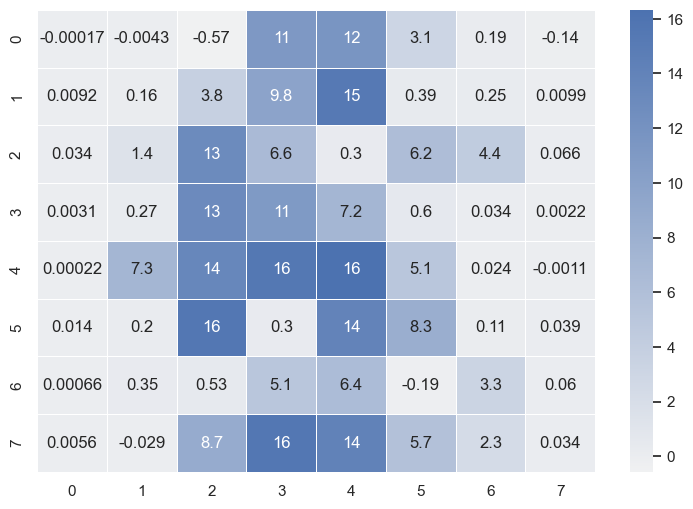

In [333]:


# create the figure, f, and the axes, ax:
f, ax = plt.subplots(figsize=(9, 6))

# colormap choice! Fun!   www.practicalpythonfordatascience.com/ap_seaborn_palette or seaborn.pydata.org/tutorial/color_palettes.html
our_colormap = sns.color_palette("light:b", as_cmap=True) 

# Draw a heatmap with the numeric values in each cell (make annot=False to remove the values)
sns.heatmap(pixels_as_image, annot=True, linewidths=.5, ax=ax, cmap=our_colormap)

In [338]:
# now looking at error for each pixel

errorList

[0.001103228558869269,
 0.14579400095057835,
 1.1996499225059367,
 1.6417108784410612,
 1.9407355471079408,
 1.708830361269092,
 0.7749759532302597,
 0.04954335241808867,
 0.015155002600291623,
 1.1362495955258545,
 2.17594195660636,
 1.94633020264392,
 2.2096456503135844,
 1.677698432802143,
 0.9258368440630341,
 0.11813502863495344,
 0.0022315954297990334,
 1.303985502305635,
 2.1489612759125896,
 2.4453205619215472,
 1.8351820972230097,
 2.0497879276179116,
 0.9297954088719598,
 0.10310049234635725,
 0.0033203813875704318,
 1.1284387833720515,
 1.8543127862726514,
 2.2453300402933265,
 1.7194032025144752,
 1.8102449851975762,
 1.0155940573838886,
 0.01003166395818915,
 0.002723956905510458,
 1.0893264925081976,
 1.8482507290742838,
 2.1559862472751505,
 1.5426532386256606,
 1.6293162934189458,
 1.0277694337605505,
 0.0006254676615969624,
 0.019184649173164897,
 0.709428682065293,
 1.7858671005049531,
 1.7552181588944051,
 1.6176540773302395,
 1.7989550565537062,
 0.9279749182950121,

In [339]:
#plotting error (ie predictability map)

pixels_as_row = errorList
print("pixels as 1d numpy array (row):\n", pixels_as_row)

pixels_as_image = np.reshape(pixels_as_row, (8,8))   # reshape into a 2d 8x8 array (image)
print("\npixels as 2d numpy array (image):\n", pixels_as_image)

pixels as 1d numpy array (row):
 [0.001103228558869269, 0.14579400095057835, 1.1996499225059367, 1.6417108784410612, 1.9407355471079408, 1.708830361269092, 0.7749759532302597, 0.04954335241808867, 0.015155002600291623, 1.1362495955258545, 2.17594195660636, 1.94633020264392, 2.2096456503135844, 1.677698432802143, 0.9258368440630341, 0.11813502863495344, 0.0022315954297990334, 1.303985502305635, 2.1489612759125896, 2.4453205619215472, 1.8351820972230097, 2.0497879276179116, 0.9297954088719598, 0.10310049234635725, 0.0033203813875704318, 1.1284387833720515, 1.8543127862726514, 2.2453300402933265, 1.7194032025144752, 1.8102449851975762, 1.0155940573838886, 0.01003166395818915, 0.002723956905510458, 1.0893264925081976, 1.8482507290742838, 2.1559862472751505, 1.5426532386256606, 1.6293162934189458, 1.0277694337605505, 0.0006254676615969624, 0.019184649173164897, 0.709428682065293, 1.7858671005049531, 1.7552181588944051, 1.6176540773302395, 1.7989550565537062, 0.9279749182950121, 0.0562865795

<Axes: >

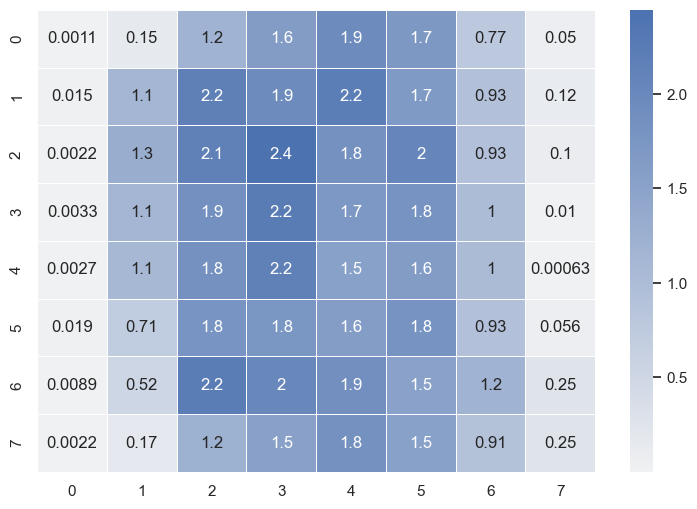

In [340]:
# create the figure, f, and the axes, ax:
f, ax = plt.subplots(figsize=(9, 6))

# colormap choice! Fun!   www.practicalpythonfordatascience.com/ap_seaborn_palette or seaborn.pydata.org/tutorial/color_palettes.html
our_colormap = sns.color_palette("light:b", as_cmap=True) 

# Draw a heatmap with the numeric values in each cell (make annot=False to remove the values)
sns.heatmap(pixels_as_image, annot=True, linewidths=.5, ax=ax, cmap=our_colormap)

Which pixel is most predictable and which is least predictable? 
+ Lowest pixel error overall is center far right side, error 0.00063.
+ Highest error is 2.4, row 2 col 3. 

Why do the answers above make sense?
+ Greatest predictability, aka lowest error, is on the edges which makes sense, they are almost never shaded in. The central pixels switch between digits and the different training data images, so they are much harder to predict correctly consistently and therefore have higher error. 
